#**Run Prediction Model**

---



Name : Akhila shirin
#####Organization : Entri Elevate
#####Date : 25-10-2024



###**1. Overview of Problem Statement**
The Indian Premier League(IPL) is a professional Tweanty20 cricket league inindia.It was established
by the Board of Control for Cricket in india(BCCI) in 2008. Player performance,
match trends, and scorring patterns which are crucial for predicting runs in future deliveries or overs.

###**2. Objectives**
 to predict how much runs will score highly in the next match using mechine learnig techniques.

####**3. Data Description**



######Source : data world
###### Features:


1.   match_id
2.   inning

1.   batting_team
2.   bowling_team

1.   over
2.   ball

1.   batsman
2.   non_strike

1.   bowler
2.   is_super_over

1.   wide_runs
2.   bye-runs

1.   legbye_runs
2.   noball_runs

1.   penalty_run
2.   batsman_runs

1.   extra_runs
2.   total_runs

1.   player_dismissed
2.   dismissal_kind

1.   fielder



###**4. Data Collection**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# import dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("deliveries.csv")
data

Saving deliveries.csv to deliveries.csv


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136593,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
136594,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
136595,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
136596,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


######In this dataset we can see 136598 rows and 21 columns.
######The dataset contains records of runs scored on each ball.  most balls result in 0-1 runs, but some balls (like boundaries and extras) could lead to significantly higher run counts (e.g., 6 or more due to wide/noball and runs off the bat).Extras are additional runs that are not scored by the batsman hitting the ball but are instead given due to errors by the bowling team. These can significantly impact the overall score, especially in tight matches. In the dataset, extras are recorded through five specific columns: wide_runs, bye_runs, legbye_runs, noball_runs, and penalty_runs.Extras are additional runs that are not scored by the batsman hitting the ball but are instead given due to errors by the bowling team. These can significantly impact the overall score, especially in tight matches. In the dataset, extras are recorded through five specific columns: wide_runs, bye_runs, legbye_runs, noball_runs, and penalty_runs
Relationships between different types of runs (wide, bye, leg-bye, etc.) and the total runs could indicate whether certain extras lead to higher scoring balls.Only 6,727 entries show a player being dismissed, which means the majority of deliveries do not result in a wicket. Understanding how dismissals impact the total runs might reveal some patterns.

In [ ]:

data.drop(columns=['player_dismissed','dismissal_kind','fielder'],inplace=True)

frist we dropped 'player_dismissed','dismissal_kind','fielder'columns because we don't need these columns for this prediction

In [ ]:
data.shape

(136598, 18)

136598 rows and 21 columns

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,136598.0,288.564679,165.929865,1.0,145.0,289.0,432.0,577.0
inning,136598.0,1.482738,0.501575,1.0,1.0,1.0,2.0,4.0
over,136598.0,10.144585,5.673901,1.0,5.0,10.0,15.0,20.0
ball,136598.0,3.617125,1.808200,1.0,2.0,4.0,5.0,9.0
is_super_over,136598.0,0.000498,0.022306,0.0,0.0,0.0,0.0,1.0
wide_runs,136598.0,0.037782,0.260535,0.0,0.0,0.0,0.0,5.0
bye_runs,136598.0,0.004978,0.115512,0.0,0.0,0.0,0.0,4.0
legbye_runs,136598.0,0.022372,0.201309,0.0,0.0,0.0,0.0,5.0
noball_runs,136598.0,0.004480,0.074062,0.0,0.0,0.0,0.0,5.0
penalty_runs,136598.0,0.000073,0.019132,0.0,0.0,0.0,0.0,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       136598 non-null  int64 
 1   inning         136598 non-null  int64 
 2   batting_team   136598 non-null  object
 3   bowling_team   136598 non-null  object
 4   over           136598 non-null  int64 
 5   ball           136598 non-null  int64 
 6   batsman        136598 non-null  object
 7   non_striker    136598 non-null  object
 8   bowler         136598 non-null  object
 9   is_super_over  136598 non-null  int64 
 10  wide_runs      136598 non-null  int64 
 11  bye_runs       136598 non-null  int64 
 12  legbye_runs    136598 non-null  int64 
 13  noball_runs    136598 non-null  int64 
 14  penalty_runs   136598 non-null  int64 
 15  batsman_runs   136598 non-null  int64 
 16  extra_runs     136598 non-null  int64 
 17  total_runs     136598 non-null  int64 
dtypes: i

Here,we can see not null values,let's check another way

In [ ]:
data.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


from this we can confirm not null values

In [ ]:
data['batting_team'].value_counts()

,count
batting_team,
Mumbai Indians,16890
Royal Challengers Bangalore,16142
Kings XI Punjab,15991
Chennai Super Kings,15754
Delhi Daredevils,15535
Kolkata Knight Riders,15463
Rajasthan Royals,13914
Deccan Chargers,9034
Sunrisers Hyderabad,7379


In [ ]:
data['batsman'].value_counts().head(10)

,count
batsman,
V Kohli,3237
SK Raina,3059
G Gambhir,3028
RG Sharma,2996
RV Uthappa,2721
S Dhawan,2622
DA Warner,2440
MS Dhoni,2419
CH Gayle,2360


In [ ]:
print("\nData types of each variable:")
print(data.dtypes)


Data types of each variable:
match_id          int64
inning            int64
batting_team     object
bowling_team     object
over              int64
ball              int64
batsman          object
non_striker      object
bowler           object
is_super_over     int64
wide_runs         int64
bye_runs          int64
legbye_runs       int64
noball_runs       int64
penalty_runs      int64
batsman_runs      int64
extra_runs        int64
total_runs        int64
dtype: object


In [ ]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0


In [ ]:
categorical_cols = data.select_dtypes(include="object").columns
numerical_cols = data.select_dtypes(include=['float64','int64']).columns
print("Categoricacl columns are:",categorical_cols)
print("Numerical columns are:",numerical_cols)

Categoricacl columns are: Index(['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')
Numerical columns are: Index(['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')


### Pairplot
Visuals are very difficult to understand a we have s large number of batsmen, so we select the 10 best

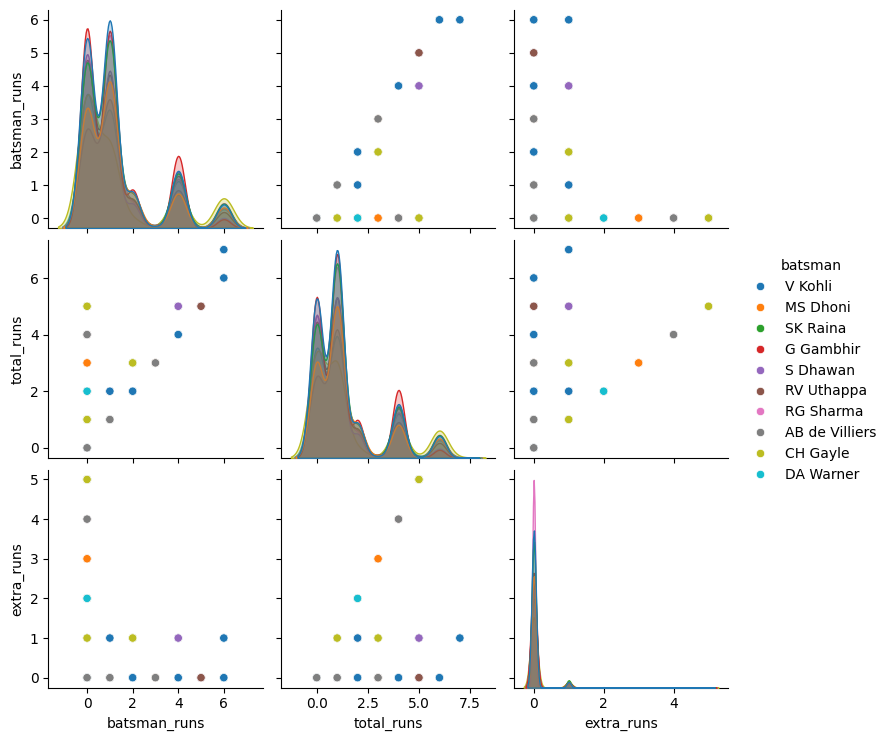

In [ ]:
top_batsmen = data.groupby('batsman')['batsman_runs'].sum().nlargest(10).index
selected_data = data[data['batsman'].isin(top_batsmen)]

# Pairplot with top 10 batsmen
sns.pairplot(selected_data, hue='batsman', vars=['batsman_runs', 'total_runs', 'extra_runs'])
plt.show()

In the pairplot the relationship between the features 'batsman_runs', 'total_runs', 'extra_runs'for the top batsmen are visualizedThe distribution of runs scored by batsmen shows clear peaks at scores of 0, 1, and 4 runs, with some occurrences of 6 runs.The total runs also exhibit a similar pattern. The distribution for extra runs (wides, no-balls, etc.) shows that they are rare, with most being 0.
##### The color-coded batsmen show similar run patterns, with V. Kohli (blue), MS Dhoni (orange), and AB de Villiers (gray) appearing frequently across the board for both 1s and 4s.Chris Gayle (gray) and David Warner (light blue) seem to be more spread across higher runs (like 4 and 6 runs),Shikhar Dhawan (purple) and Rohit Sharma (green) also follow a similar pattern, with frequent single runs and occasional boundaries.

Countplot

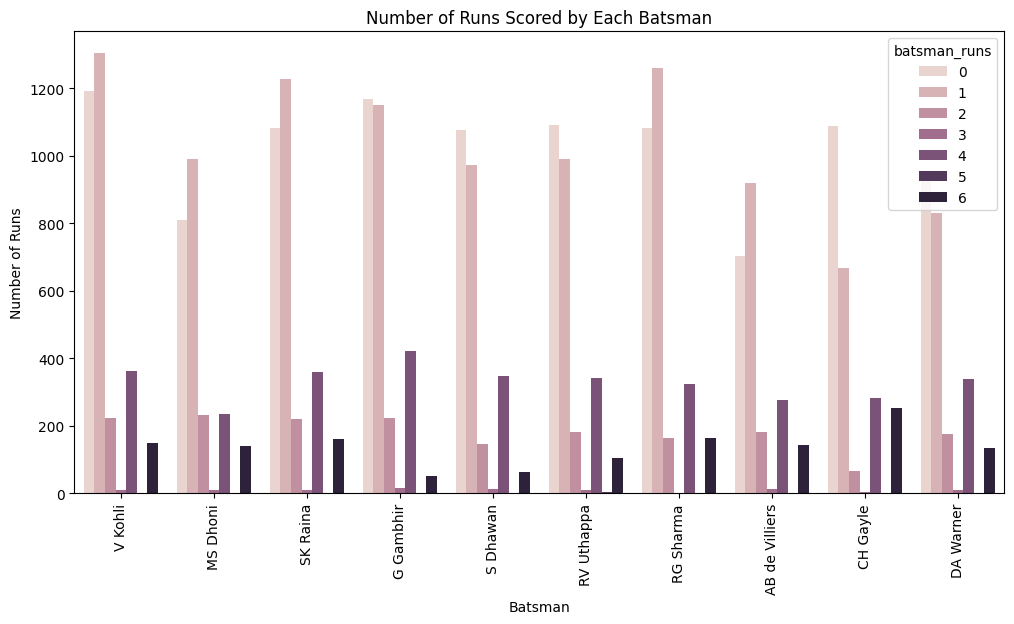

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='batsman', hue='batsman_runs', data=selected_data)
plt.title('Number of Runs Scored by Each Batsman')
plt.xticks(rotation=90)  # Rotate the x-axis labels if there are many batsmen
plt.xlabel('Batsman')
plt.ylabel('Number of Runs')
plt.show()

Most of the top batsmen, like V Kohli, S Dhawan, RG Sharma, and G Gambhir, have a wide spread of scores across the 0 to 6 range.
Batsmen like CH Gayle and AB de Villiers show a relatively lower count for 0-2 runs, indicating they tend to score higher runs more frequently.
The lightest shade in the bars represents lower runs (0-2). These tend to dominate for many batsmen, especially SK Raina and MS Dhoni, which suggests that a significant portion of their performances consists of lower scores.Darker shades (3-6 runs) are more common for batsmen like G Gambhir, S Dhawan, and V Kohli. These players consistently score above 3 runs more frequently.
##### The number of low scores (0-1 runs) tends to be high for all batsmen, but top players like V Kohli and S Dhawan also show a significant number of high-run performances, suggesting their ability to recover from low scores quickly.

#### Boxplot

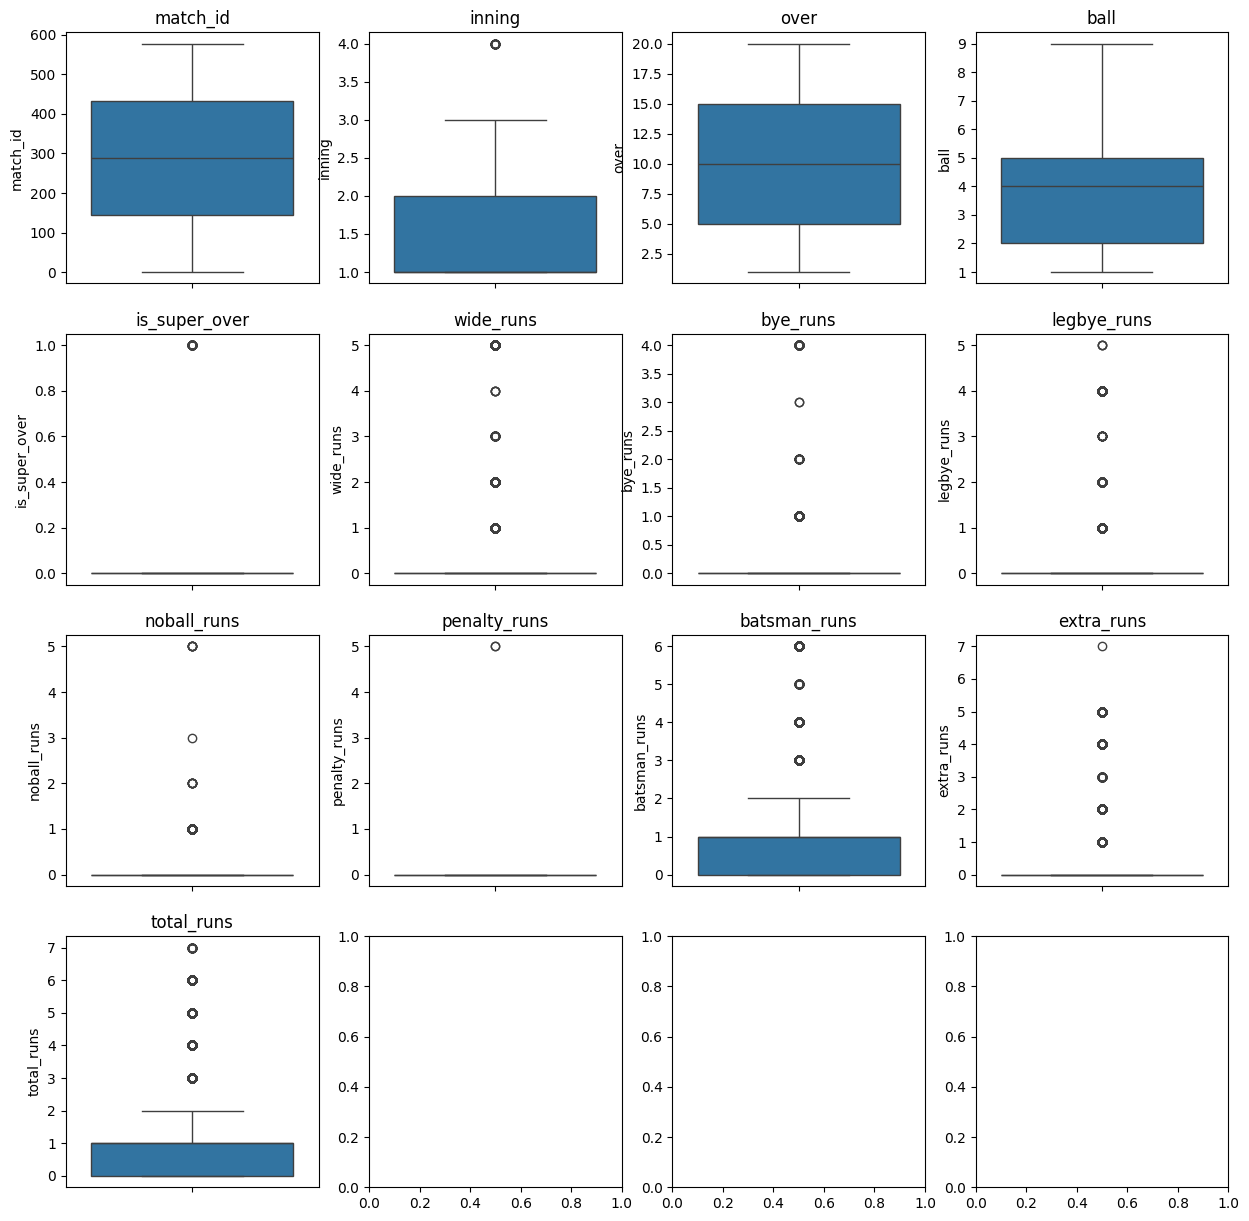

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(column)


The circles above the whiskers indicate the outliers in your data. These are the batsmen with high scores (around 4 to 6 runs) that are beyond the typical spread of the data.

#### Histogram

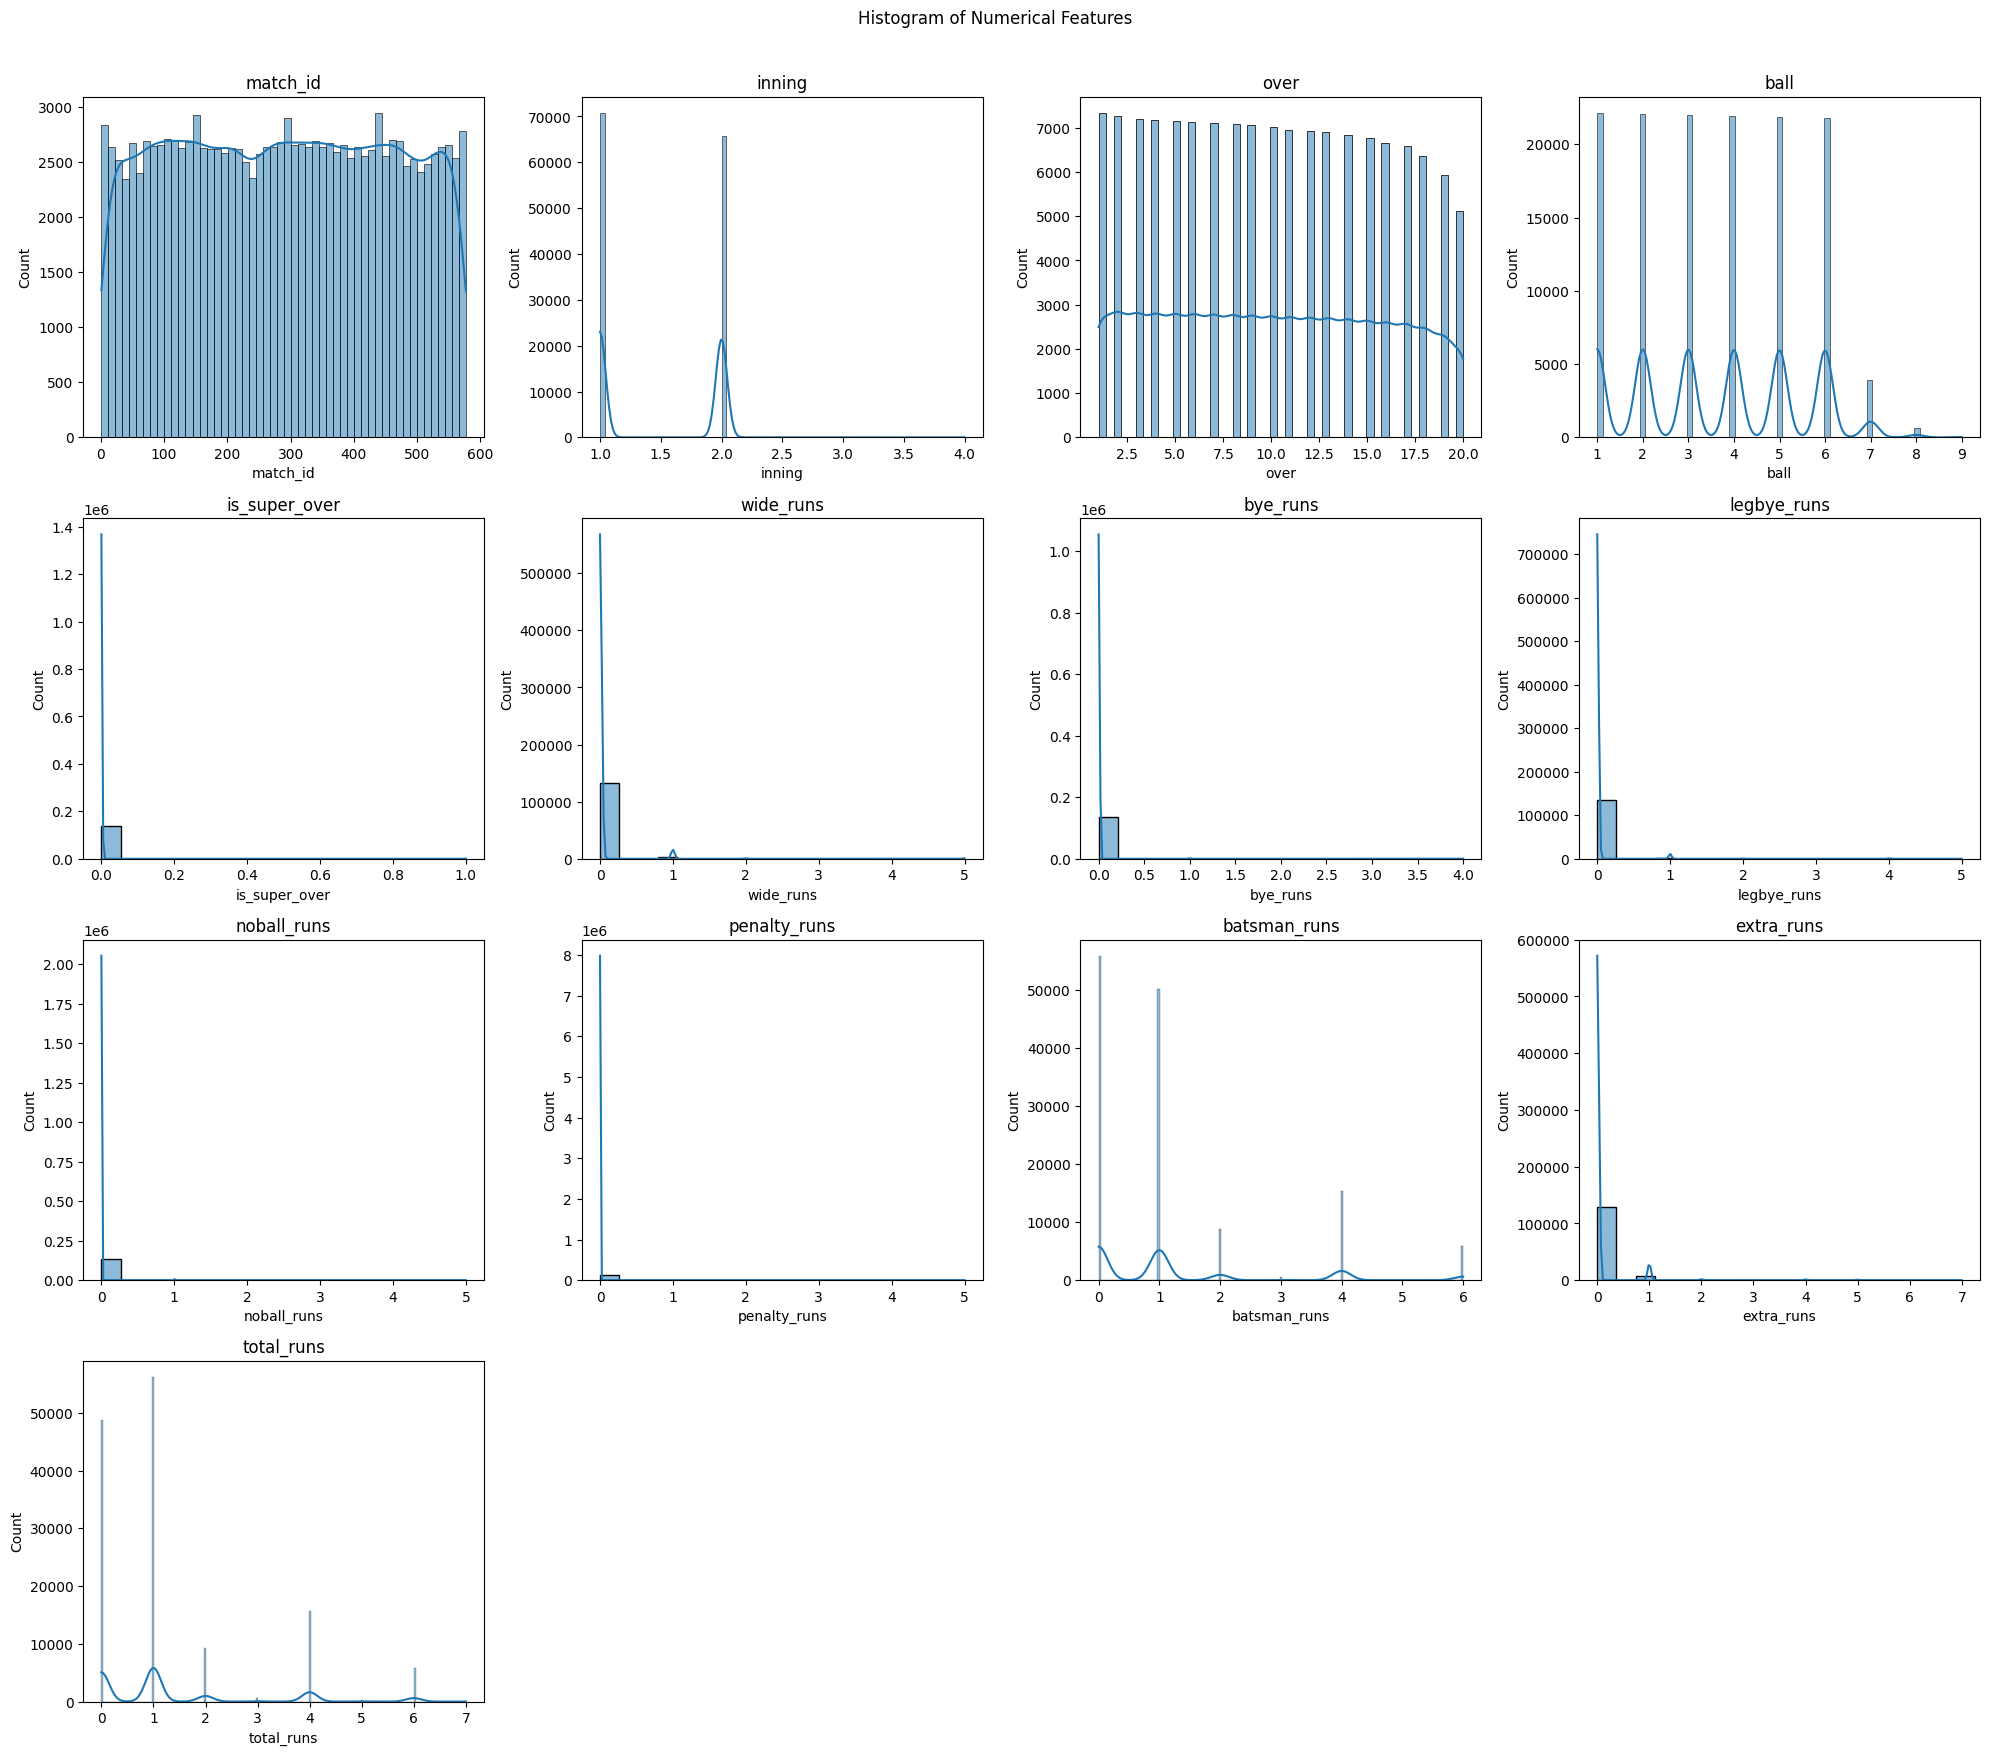

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1)  # Adjusted the grid to 6 rows and 7 columns
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Histogram of Numerical Features', y=1.02)
plt.show()

The vast majority of entries are in the first and second innings with very few data points for additional innings, which are likely from super overs or extended matches.The 'over' histogram shows a decreasing trend as the over number increases, which might suggest that not all matches in the dataset have a full set of 20 overs.
The 'ball' histogram shows that deliveries are mostly concentrated around the first few balls, with a rapid decline afterward, possibly due to incomplete overs at the end of innings or matches.Runs Related Features (Wide Runs, Bye Runs, Legbye Runs, NoBall Runs, Penalty Runs, Batsman Runs, Extra Runs, Total Runs) are heavily skewed with a large number of zeros, indicating that runs from these specific events are relatively rare compared to normal scoring.
The 'is_super_over' plot shows that super overs are very rare occurrences in your dataset.

###Using IQR (Interquartile Range) Method For Handling Outliers
The IQR method defines outliers as values outside of 1.5 times the interquartile range (IQR).

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_data = data[~((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)]

# Display the data without outliers
print("Data without outliers:", new_data.shape)

Data without outliers: (107439, 21)


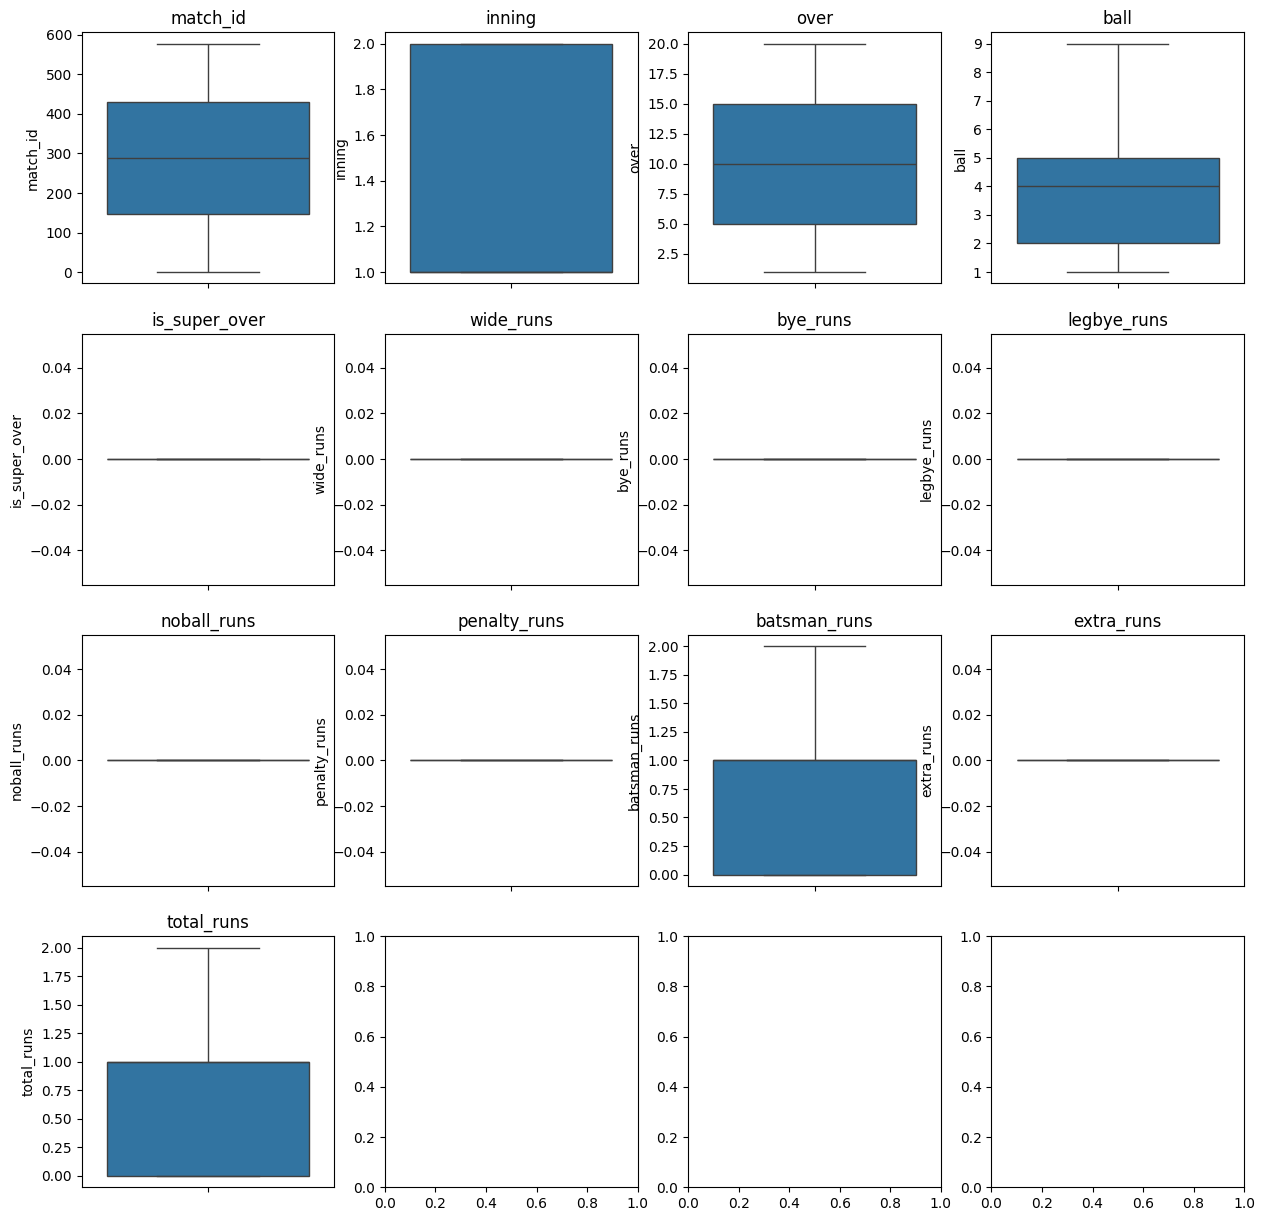

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=new_data[column], ax=axes[i])
    axes[i].set_title(column)

oulliers appear to be decreasing

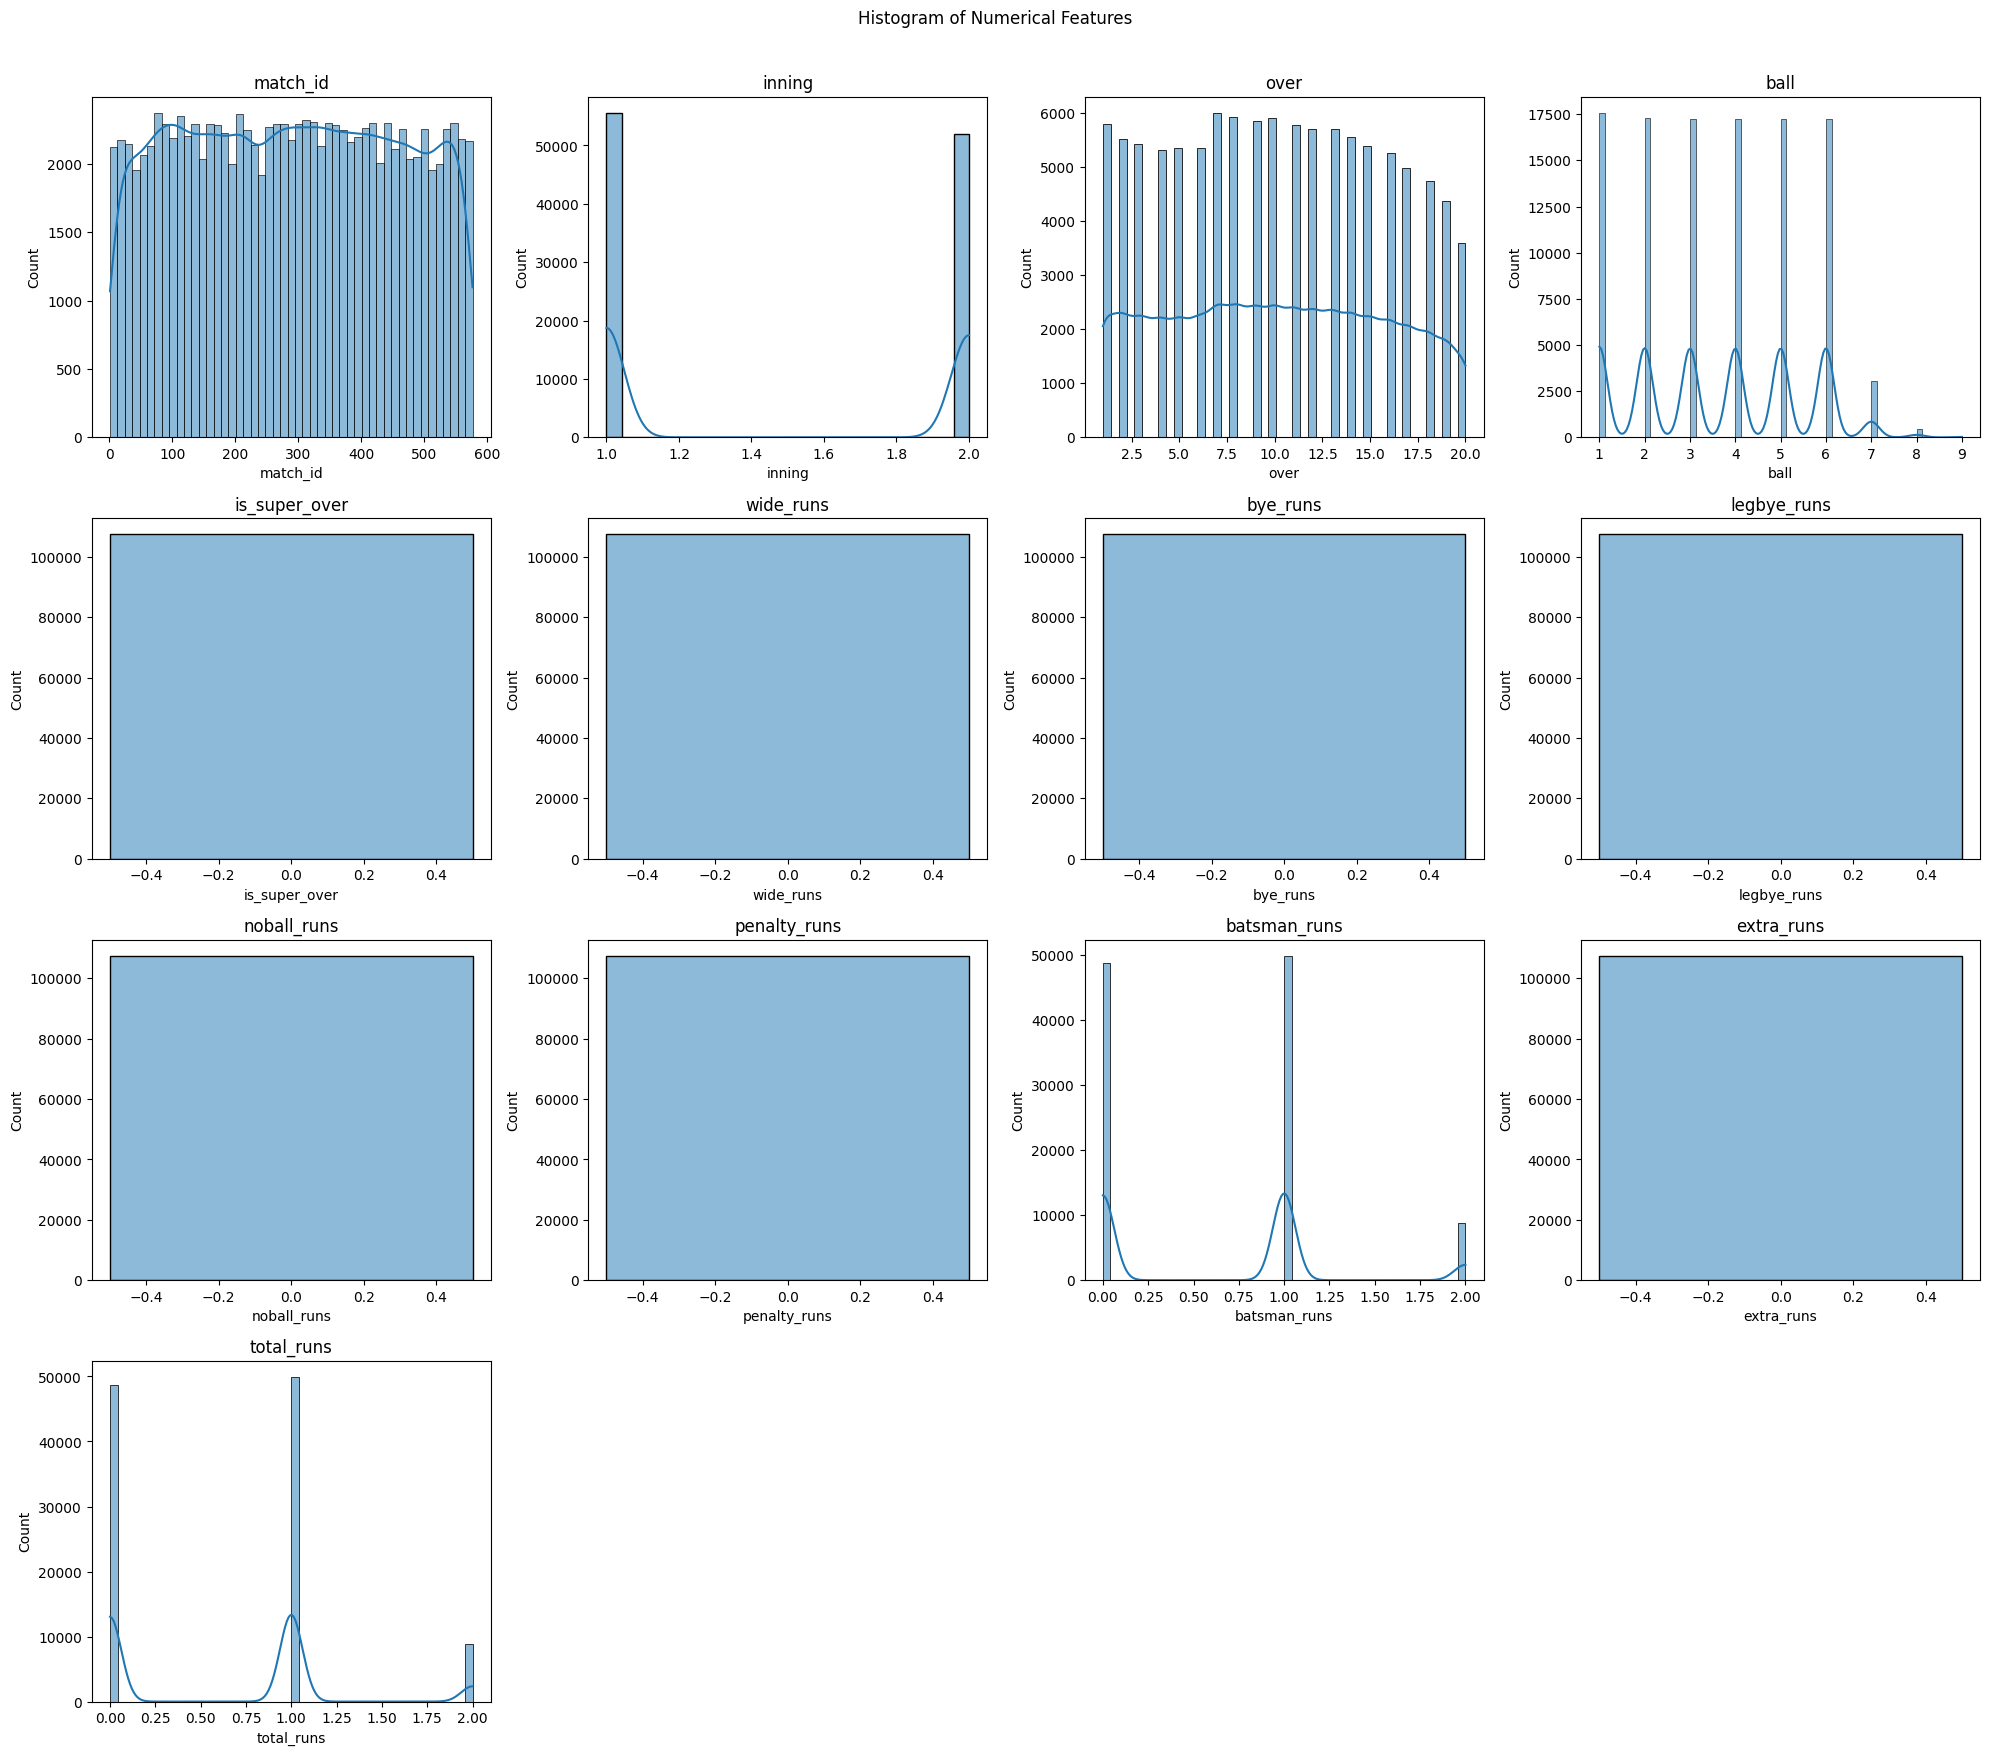

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1)  # Adjusted the grid to 6 rows and 7 columns
    sns.histplot(new_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Histogram of Numerical Features', y=1.02)
plt.show()

Histplot of 'innings'  shows a clear concentration in the 1st and 2nd innings, as expected in typical cricket matches. 'over' shows, the frequency decreases as the over number increases, which might indicate that many innings do not reach the maximum number of overs, possibly due to the conclusion of gameplay.The plot of ''ball' column suggests most balls bowled are between 1 and 6 in an over, which aligns with standard cricket rules, but there’s a visible occurrence beyond the 6th ball, likely due to no-balls or wides extending the over.Wide Runs, Bye Runs, Legbye Runs, NoBall Runs, Penalty Runs, Batsman Runs, Extra Runs, Total Runs are highly skewed with most values at or near zero, reflecting the typical scoring pattern where no runs or extras are the most common outcome, with higher values being increasingly rare.'is_super_over' being primarily zero shows that super overs are not a common occurrence.

#### Heatmap

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,-0.000772,0.004704,-0.003612,0.001831,-0.007765,-0.007176,-0.006699,-0.010506,-0.001800,0.016504,-0.014187,0.013441
inning,-0.000772,1.000000,-0.050077,-0.003268,0.087140,0.001658,-0.001044,-0.001903,0.001294,0.003946,-0.006903,0.000282,-0.006886
over,0.004704,-0.050077,1.000000,-0.011685,-0.035969,-0.018037,0.014294,-0.005505,0.016106,-0.001109,0.093410,-0.008447,0.092150
ball,-0.003612,-0.003268,-0.011685,1.000000,-0.002172,-0.006589,0.007513,-0.004162,0.003188,0.000810,0.008559,-0.004061,0.007708
is_super_over,0.001831,0.087140,-0.035969,-0.002172,1.000000,-0.001977,-0.000962,0.000780,0.011944,-0.000085,0.013907,0.001172,0.014263
wide_runs,-0.007765,0.001658,-0.018037,-0.006589,-0.001977,1.000000,-0.006250,-0.016117,-0.008773,0.014132,-0.110869,0.725016,0.050630
bye_runs,-0.007176,-0.001044,0.014294,0.007513,-0.000962,-0.006250,1.000000,-0.004789,-0.002607,-0.000165,-0.032948,0.319007,0.038219
legbye_runs,-0.006699,-0.001903,-0.005505,-0.004162,0.000780,-0.016117,-0.004789,1.000000,-0.006723,-0.000425,-0.084964,0.554823,0.038624
noball_runs,-0.010506,0.001294,0.016106,0.003188,0.011944,-0.008773,-0.002607,-0.006723,1.000000,-0.000231,-0.000359,0.198432,0.044045
penalty_runs,-0.001800,0.003946,-0.001109,0.000810,-0.000085,0.014132,-0.000165,-0.000425,-0.000231,1.000000,-0.002925,0.064219,0.011426


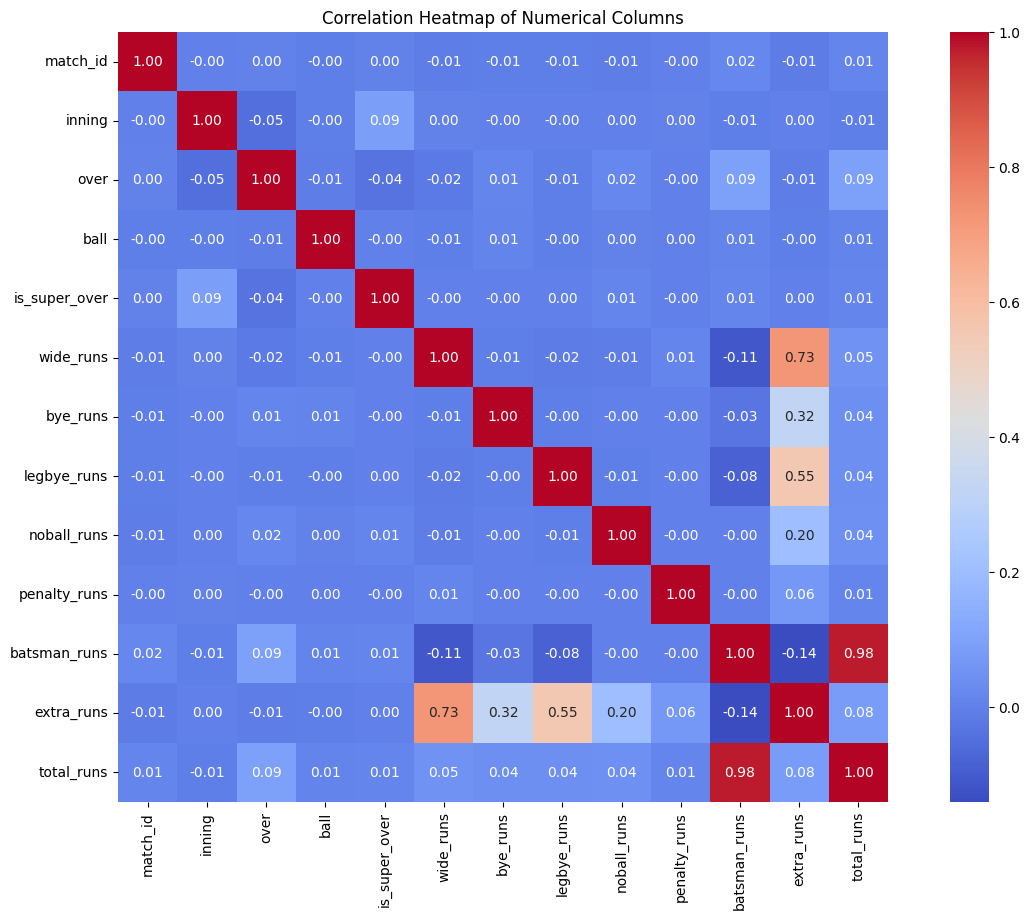

In [ ]:
plt.figure(figsize =(16,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

The correlation between batsman_runs and total_runs is 0.98, which indicates a strong positive relationship.'extra_runs' positively Correlated with wide_runs
(0.73), bye_runs(0.32), and legbye_runs(0.55).Many features have very low or close-to-zero correlations, suggesting that most of the features are fairly independent of each other. For example, match_id, inning, and over don't have strong correlations with other features.

#### **7. Feature Engineering**

##### Label Encoding For Target Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Label encode the target variable (batsman)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(new_data['batsman'])

#### One - Hot Encoding For Categorical Columns

In [ ]:
#  Define categorical columns, excluding 'batsman'
categorical_cols = ['batting_team', 'bowling_team', 'non_striker', 'bowler']

#  Apply one-hot encoding to the features, excluding 'batsman'
data_encoded = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)

for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

#  The X feature set is the one-hot encoded data
X = data_encoded

In [ ]:
data_encoded

,match_id,inning,over,ball,batsman,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,...,bowler_WD Parnell,bowler_WPUJC Vaas,bowler_Y Gnaneswara Rao,bowler_Y Nagar,bowler_Y Venugopal Rao,bowler_YA Abdulla,bowler_YK Pathan,bowler_YS Chahal,bowler_Yuvraj Singh,bowler_Z Khan
1,1,1,1,2,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,1,4,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,5,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5,1,1,1,6,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
7,1,1,2,1,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136590,577,2,19,5,378,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
136592,577,2,20,1,81,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
136593,577,2,20,2,378,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
136594,577,2,20,3,378,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


### **8. Feature Selection**

### SelectKbest -Filter method

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2
# Separate categorical and numerical features
categorical_cols = data_encoded.select_dtypes(include=['object','bool']).columns
numerical_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns

X_categorical = data_encoded[categorical_cols]
X_numerical = data_encoded[numerical_cols]

# Chi-squared test for categorical features
chi_selector = SelectKBest(chi2, k=5)  # Adjust k as needed
X_chi = chi_selector.fit_transform(X_categorical, y)
chi_selected_features = X_categorical.columns[chi_selector.get_support()]

# ANOVA for numerical features
f_selector = SelectKBest(f_regression, k=5)
X_f = f_selector.fit_transform(X_numerical, y)
f_selected_features = X_numerical.columns[f_selector.get_support()]

print("Chi-squared selected features:", chi_selected_features)
print("ANOVA selected features:", f_selected_features)

Chi-squared selected features: Index(['batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
       'non_striker_DP Nannes', 'non_striker_PM Sarvesh Kumar',
       'non_striker_S Ladda'],
      dtype='object')
ANOVA selected features: Index(['match_id', 'over', 'batsman', 'total_runs', 'player_dismissed'], dtype='object')


In [ ]:
X

,match_id,inning,over,ball,batsman,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,...,bowler_WD Parnell,bowler_WPUJC Vaas,bowler_Y Gnaneswara Rao,bowler_Y Nagar,bowler_Y Venugopal Rao,bowler_YA Abdulla,bowler_YK Pathan,bowler_YS Chahal,bowler_Yuvraj Singh,bowler_Z Khan
1,1,1,1,2,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,1,4,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,5,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5,1,1,1,6,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
7,1,1,2,1,60,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136590,577,2,19,5,378,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
136592,577,2,20,1,81,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
136593,577,2,20,2,378,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
136594,577,2,20,3,378,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y

array([ 60,  60,  60, ..., 378, 378, 378])

In [ ]:
# Combine the selected categorical and numerical features
selected_features = list(chi_selected_features) + list(f_selected_features)

# Create a new dataset with only the selected features
X = data_encoded[selected_features]
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
batting_team_Mumbai Indians
batting_team_Rajasthan Royals
non_striker_DP Nannes
non_striker_PM Sarvesh Kumar
non_striker_S Ladda
match_id
over
batsman
total_runs
player_dismissed


### **9. Split Data into Training and Testing Sets**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

Training set shape (X_train): (85951, 10)
Testing set shape (X_test): (21488, 10)
Training target shape (y_train): (85951,)
Testing target shape (y_test): (21488,)


### **10. Feature Scaling**

Standared Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.37266121,  2.96075148, -0.01131354, ...,  0.63183433,
         0.58979746,  0.22050673],
       [ 2.68340247, -0.33775209, -0.01131354, ...,  1.10700891,
        -0.99591625, -1.0343419 ],
       [-0.37266121, -0.33775209, -0.01131354, ..., -0.96281934,
         0.58979746,  0.22050673],
       ...,
       [-0.37266121, -0.33775209, -0.01131354, ..., -0.24603057,
        -0.99591625,  0.22050673],
       [-0.37266121, -0.33775209, -0.01131354, ..., -0.96281934,
         0.58979746,  0.22050673],
       [ 2.68340247, -0.33775209, -0.01131354, ...,  1.17143936,
         0.58979746,  0.22050673]])

In [ ]:
X_train_scaled.shape

(85951, 10)

In [ ]:
X_test_scaled

array([[-0.37266121, -0.33775209, -0.01131354, ..., -0.69704373,
        -0.99591625,  0.22050673],
       [-0.37266121, -0.33775209, -0.01131354, ...,  1.64661394,
         0.58979746,  0.22050673],
       [-0.37266121,  2.96075148, -0.01131354, ...,  1.16338555,
         2.17551118,  0.22050673],
       ...,
       [ 2.68340247, -0.33775209, -0.01131354, ...,  0.40632775,
         0.58979746,  0.22050673],
       [ 2.68340247, -0.33775209, -0.01131354, ..., -0.42321431,
         0.58979746,  0.22050673],
       [-0.37266121, -0.33775209, -0.01131354, ..., -1.10778786,
         0.58979746,  0.22050673]])

In [ ]:
X_test_scaled.shape

(21488, 10)

### **11. Build the ML Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

Random Forest Regressor

In [ ]:
rf_model =  RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=5,min_samples_leaf=3,random_state=42)
rf_model.fit(X_train_scaled,y_train)
y_predict_rf = rf_model.predict(X_test_scaled)

Gradient Boosting regressor

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,subsample=0.9,random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

Decision Tree Regressor

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=5,min_samples_split=10,min_samples_leaf=5,max_leaf_nodes=20, random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

MLP

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(50,), alpha=0.001, max_iter=500,learning_rate_init=0.001, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

### **12. Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation function
def evaluate_model(model_name, y_test, y_predict):
    MAE = mean_absolute_error(y_test, y_predict)
    MSE = mean_squared_error(y_test, y_predict)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, y_predict)

    print(f"Model: {model_name}")
    print("Mean Absolute Error:", MAE)
    print("Mean Squared Error:", MSE)
    print("Root Mean Squared Error: ",RMSE)
    print("R2 Score:", R2)
    print("\n")

# Evaluate models
evaluate_model("Linear Regression",y_test, y_pred_lin)
evaluate_model("Random Forest Regressor",y_test,y_predict_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)
evaluate_model("Decision Tree Regressor", y_test, y_pred_dt)
evaluate_model("MLP Regressor", y_test, y_pred_mlp)

Model: Linear Regression
Mean Absolute Error: 2.0971790532354907e-13
Mean Squared Error: 7.272900472443068e-26
Root Mean Squared Error:  2.6968315617485397e-13
R2 Score: 1.0


Model: Random Forest Regressor
Mean Absolute Error: 0.001633908200902837
Mean Squared Error: 0.0006620172246180806
Root Mean Squared Error:  0.025729695385256324
R2 Score: 0.9999999571946799


Model: Gradient Boosting
Mean Absolute Error: 0.2454044192462945
Mean Squared Error: 0.217991253965868
Root Mean Squared Error:  0.4668953351296926
R2 Score: 0.9999859049205063


Model: Decision Tree Regressor
Mean Absolute Error: 4.244921881615613
Mean Squared Error: 27.80727464168102
Root Mean Squared Error:  5.273260342679945
R2 Score: 0.9982020115970398


Model: MLP Regressor
Mean Absolute Error: 0.0619579708713759
Mean Squared Error: 0.021850144860815778
Root Mean Squared Error:  0.14781794498915135
R2 Score: 0.999998587193187




### **13. Hyperparameter Tuning**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
ridge = Ridge(alpha=1.0)  # You can adjust alpha to control regularization strength
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")

Ridge Regression MSE: 2.137440294672389e-06


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for each model

linear_reg_params = {}  # No parameters to tune for basic linear regression

In [ ]:
# Random Forest
random_forest_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
# Gradient Boosting
gradient_boosting_params = {
    'n_estimators': [50, 100,],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

In [ ]:
# Decision Tree
dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# MLP
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,)],
    'solver': ['adam'],
    'max_iter': [300, 500],
    'early_stopping': [True]
}

In [ ]:
# Create models for GridSearch
models_params = {
    'Linear Regression': (LinearRegression(), linear_reg_params),
    'Random Forest': (RandomForestRegressor(random_state=42), random_forest_params),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), gradient_boosting_params),
    'Decision Tree Regressor': (DecisionTreeRegressor(random_state=42), dt_params),
    'MLP Regressor': (MLPRegressor(random_state=42), mlp_params)

}

In [ ]:
# Perform grid search for each model
for model_name, (model,params) in models_params.items():

    randomized_search = RandomizedSearchCV(model,params, cv=5, scoring='neg_mean_squared_error')
    randomized_search.fit(X_train_scaled, y_train)

    best_model = randomized_search.best_estimator_
    y_predict = best_model.predict(X_test_scaled)

    # Evaluate the best model
    MAE = mean_absolute_error(y_test, y_predict)
    MSE = mean_squared_error(y_test,y_predict)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, y_predict)

    print(f"Model: {model_name}")
    print(f"Best parameters: {randomized_search.best_params_}")
    print("Mean Absolute Error:", MAE)
    print("Mean Squared Error:", MSE)
    print("Root Mean Squared Error: ",RMSE)
    print("R2 Score:", R2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model: Linear Regression
Best parameters: {}
Mean Absolute Error: 2.0971790532354907e-13
Mean Squared Error: 7.272900472443068e-26
Root Mean Squared Error:  2.6968315617485397e-13
R2 Score: 1.0


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Model: Random Forest
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Mean Absolute Error: 0.0006008004467609792
Mean Squared Error: 0.00034497859270290717
Root Mean Squared Error:  0.018573599347000765
R2 Score: 0.999999977694056
Model: Gradient Boosting
Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Mean Absolute Error: 0.01403037248574189
Mean Squared Error: 0.0017487808443001072
Root Mean Squared Error:  0.04181842709022073
R2 Score: 0.9999998869257157


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Model: Decision Tree Regressor
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Mean Absolute Error: 1.2319116534062673
Mean Squared Error: 19.272425390971232
Root Mean Squared Error:  4.390037060318652
R2 Score: 0.9987538657492906
Model: MLP Regressor
Best parameters: {'solver': 'adam', 'max_iter': 300, 'hidden_layer_sizes': (100,), 'early_stopping': True}
Mean Absolute Error: 0.6692553395426644
Mean Squared Error: 1.3000427454859256
Root Mean Squared Error:  1.1401941700806602
R2 Score: 0.9999159406374822


Both models have R² scores very close to 1.0, indicating that both models are doing an excellent job of explaining the variance in the target variable. The Linear Regression model has a perfect R² score of 1.0, which means it fits the training data perfectly, while Random Forest is nearly perfect with 0.999999977694056.The Linear Regression model has extremely low MAE and RMSE values, indicating that its predictions are incredibly close to the actual values.
The Random Forest model also has very low MAE and RMSE values, though they are slightly higher than the Linear Regression model.So i choose Linear Regression.

### **14. Save the Model**

In [ ]:
from joblib import dump, load

# Save the model to a file
dump(lin_reg,'linear_regression_model.joblib')

print("Model saved successfully.")

# Load the model from the file
model = load('linear_regression_model.joblib')

Model saved successfully.


### **15. Test With Unseen Data**

In [ ]:
import pandas as pd

# Create the unseen data
unseen_data = {
    'batting_team_Mumbai Indians': [1],  # Mumbai Indians is batting
    'batting_team_Rajasthan Royals': [0],  # Rajasthan Royals is not batting
    'non_striker_DP Nannes': [0],  # DP Nannes is not the non-striker
    'non_striker_PM Sarvesh Kumar': [1],  # PM Sarvesh Kumar is the non-striker
    'non_striker_S Ladda': [0],  # S Ladda is not the non-striker
    'match_id': [12345],  # Some match ID
    'over': [15],  # 15th over of the match
    'batsman': ['SC Ganguly'],  # The batsman's name
    'batsman_runs': [4],  # The batsman hit 4 runs
    'total_runs': [4]  # The total runs in that ball (no extras)
}

# Convert the dictionary into a DataFrame
unseen_data_df = pd.DataFrame(unseen_data)


In [ ]:
unseen_data_df

,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,non_striker_DP Nannes,non_striker_PM Sarvesh Kumar,non_striker_S Ladda,match_id,over,batsman,batsman_runs,total_runs
0,1,0,0,1,0,12345,15,SC Ganguly,4,4


In [ ]:
unseen_data_df.isnull().sum()

,0
batting_team_Mumbai Indians,0
batting_team_Rajasthan Royals,0
non_striker_DP Nannes,0
non_striker_PM Sarvesh Kumar,0
non_striker_S Ladda,0
match_id,0
over,0
batsman,0
batsman_runs,0
total_runs,0


Label Encoding for the only a numeric feature(target feature) batsman

In [ ]:
label_encoder = LabelEncoder()
unseen_data_df['batsman_encoded'] = pd.Series(label_encoder.fit_transform(unseen_data_df['batsman']))


In [ ]:
unseen_data_df['batsman_encoded']

,batsman_encoded
0,0


Feature scaling for unseen data

In [ ]:
# Select numerical columns
numerical_cols = ['batting_team_Mumbai Indians','batting_team_Rajasthan Royals','non_striker_DP ''Nannes','non_striker_PM Sarvesh Kumar','non_striker_S Ladda',
                  'match_id','over','batsman_runs','total_runs',]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_numerical_data = scaler.fit_transform(unseen_data_df[numerical_cols])

# Convert scaled data back to a DataFrame (for ease of concatenation)
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)



In [ ]:
scaled_numerical_df


,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,non_striker_DP Nannes,non_striker_PM Sarvesh Kumar,non_striker_S Ladda,match_id,over,batsman_runs,total_runs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
final_unseen_data = pd.concat([scaled_numerical_df,unseen_data_df['batsman_encoded']],axis=1)

In [72]:
# Load your pre-trained model
model = load('linear_regression_model.joblib')

# Make predictions
predictions = model.predict(final_unseen_data)
print(predictions)

[222.54835895]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### **16. Interpretation of Results (Conclusion)**

The prediction value of [222.54835895] likely means that your Linear Regression model is predicting a value of 222.55 for the unseen data. Given that you're working on a cricket-related dataset where you're trying to predict the score or runs of a batsman in the next match
##### To analyze the performance of Linear Regression model and draw meaningful conclusions, we need to evaluate its performance based on the metrics  have calculated and interpret the model's behavior in relation to the dataset. Additionally, we will look into potential limitations in the dataset that may affect the model's performance and generalizability.
##### Key Metrics from Linear Regression:

*  Mean Absolute Error (MAE): 2.0971790532354907e-13



*   Mean Squared Error (MSE): 7.272900472443068e-26

*  Root Mean Squared Error (RMSE): 2.6968315617485397e-13


*   R² Score: 1.0


MAE and RMSE: The very low error values (near zero) suggest that the model has extremely high accuracy on the training data. The MSE and RMSE values are also extremely small, indicating minimal error in the predictions.
R² Score: The R² score of 1.0 suggests that the model explains 100% of the variance in the target variable. This is a perfect fit, which might be too good to be true.
##### The perfect performance metrics raise the question of whether the model is overfitting to the training data. Overfitting occurs when a model learns the noise or specific details in the training data, resulting in near-perfect performance on the training set but poor generalization to unseen data.

### **17. Future Work**

 #### Explore deep learning algorithms for potentially higher accuracy.


LSTM

In [79]:
pip install tensorflow

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming X_train is your feature data and y_train is your target
print("Original X_train shape:", X_train_scaled.shape)

# Reshaping X_train to 3D format for LSTM
X_train_lstm = np.reshape(X_train, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

# Print the reshaped data
print("Reshaped X_train_scaled for LSTM:", X_train_lstm.shape)

Original X_train shape: (85951, 10)
Reshaped X_train_scaled for LSTM: (85951, 1, 10)


In [74]:
import numpy as np
import pandas as pd

# Example: Converting boolean columns to int
X_train_scaled = X_train_scaled.astype(int)
X_test_scaled = X_test_scaled.astype(int)

# Check for other non-numeric columns and ensure they are properly converted

# Convert to float32 (optional)
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)

# Reshape for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2686/2686 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 45360.0586
Epoch 2/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3412.1960
Epoch 3/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 3122.7808
Epoch 4/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 3118.0364
Epoch 5/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3074.3337
Epoch 6/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3041.2185
Epoch 7/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3024.7981
Epoch 8/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3037.3164
Epoch 9/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 3007.8308
Epoch 10/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2988.6001
Epoch 11/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 2994.2522
Epoch 12/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3011.8140
Epoch 13/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3010.5510
Epoch 14/100
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/st

In [75]:
# Make predictions using the trained LSTM model
y_pred = model.predict(X_test_lstm)

672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [76]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 42.29143628606757
Mean Squared Error (MSE): 2940.892152439416
Root Mean Squared Error (RMSE): 54.22999310749925
R² Score: 0.8098450899124146


The R² score of 0.81 indicates that the model explains 81% of the variance in the target variable (runs or score in cricket). This is a good score, showing that the model is capturing most of the patterns in the data, but there’s still room for improvement since 19% of the variance is not explained by the model.

#### Update the model periodically with new data.

In [78]:
# Reshape the unseen data for LSTM
# LSTM expects input in the form (samples, time steps, features)
final_unseen_data_lstm = np.reshape(final_unseen_data.values, (final_unseen_data.shape[0], 1, final_unseen_data.shape[1]))

# Save the model to a file
dump(model,'my_lstm_model.joblib')

# Load the pre-trained LSTM model
model = load('my_lstm_model.joblib')  # Replace with the path to your saved model

# Make predictions on the unseen data
y_pred = model.predict(final_unseen_data_lstm)

# Output the predictions
print(f"Predictions for the unseen data: {y_pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predictions for the unseen data: [[211.37595]]
